In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!unzip -o "/content/gdrive/MyDrive/FIRFECTLABEL.zip" -d "/content/gdrive/MyDrive/FIRFECTLABEL"

Archive:  /content/gdrive/MyDrive/FIRFECTLABEL.zip
   creating: /content/gdrive/MyDrive/FIRFECTLABEL/images/
   creating: /content/gdrive/MyDrive/FIRFECTLABEL/labels/
  inflating: /content/gdrive/MyDrive/FIRFECTLABEL/classes.txt  
  inflating: /content/gdrive/MyDrive/FIRFECTLABEL/notes.json  
  inflating: /content/gdrive/MyDrive/FIRFECTLABEL/images/002c9c83-5633.png  
  inflating: /content/gdrive/MyDrive/FIRFECTLABEL/images/008f0a14-23582.png  
  inflating: /content/gdrive/MyDrive/FIRFECTLABEL/images/011cbed7-30655.png  
  inflating: /content/gdrive/MyDrive/FIRFECTLABEL/images/011ff392-30614.png  
  inflating: /content/gdrive/MyDrive/FIRFECTLABEL/images/016a64ca-27717.png  
  inflating: /content/gdrive/MyDrive/FIRFECTLABEL/images/016ee3d9-41.png  
  inflating: /content/gdrive/MyDrive/FIRFECTLABEL/images/0176269e-33822.png  
  inflating: /content/gdrive/MyDrive/FIRFECTLABEL/images/0184add3-27340.png  
  inflating: /content/gdrive/MyDrive/FIRFECTLABEL/images/01a4343e-27353.png  
  inflat

In [ ]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

# TO DO: Improve robustness of train_val_split.py script so it can handle nested data folders, etc
!python train_val_split.py --datapath="/content/gdrive/MyDrive/FIRFECTLABEL" --train_pct=0.9

--2025-02-23 23:58:50--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-02-23 23:58:51 (53.0 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 1318
Number of annotation files: 1318
Images moving to train: 1186
Images moving to validation: 132


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/gdrive/MyDrive/DATA',
      'train': '/content/gdrive/MyDrive/DATA/train/images',
      'val': '/content/gdrive/MyDrive/DATA/validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/gdrive/MyDrive/FIRFECTLABEL/classes.txt'
path_to_data_yaml = '/content/gdrive/MyDrive/DATA/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/gdrive/MyDrive/DATA/data.yaml

Created config file at /content/gdrive/MyDrive/DATA/data.yaml

File contents:

path: /content/gdrive/MyDrive/DATA
train: /content/gdrive/MyDrive/DATA/train/images
val: /content/gdrive/MyDrive/DATA/validation/images
nc: 21
names:
- 100_speed
- 20_speed
- 60_speed
- 80_lifted
- attention_bottleneck
- attention_bumpers
- attention_children
- attention_curvy
- attention_deer
- attention_left_turn
- attention_pedestrian
- attention_right_turn
- attention_slippery
- lifted_no_overtaking_general
- no_way_general
- no_way_trucks
- stop
- turn_left
- turn_right
- turn_straight_left
- turn_straight_right


In [ ]:
!yolo detect train data=/content/drive/MyDrive/DATA/data.yaml model=yolov8m.pt epochs=30 imgsz=640 batch=16

PRO TIP 💡 Replace 'model=yolov5m.pt' with new 'model=yolov5mu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov5m.pt, data=/content/drive/MyDrive/DATA/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, so

In [ ]:
!yolo detect predict model=/content/runs/detect/train/weights/best.pt source=/content/gdrive/MyDrive/DATA/validation/images save=True

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,851,919 parameters, 0 gradients, 78.8 GFLOPs

image 1/132 /content/gdrive/MyDrive/DATA/validation/images/01d67e30-28280.png: 608x640 1 attention_bottleneck, 47.4ms
image 2/132 /content/gdrive/MyDrive/DATA/validation/images/0931aec3-26479.png: 544x640 1 attention_left_turn, 105.0ms
image 3/132 /content/gdrive/MyDrive/DATA/validation/images/0c419ae5-32140.png: 640x640 1 attention_deer, 38.2ms
image 4/132 /content/gdrive/MyDrive/DATA/validation/images/0c4bdf29-30850.png: 576x640 1 attention_children, 41.6ms
image 5/132 /content/gdrive/MyDrive/DATA/validation/images/0d095fd1-30632.png: 608x640 1 attention_pedestrian, 37.2ms
image 6/132 /content/gdrive/MyDrive/DATA/validation/images/0d299c8b-35500.png: 640x640 1 turn_straight_right, 37.7ms
image 7/132 /content/gdrive/MyDrive/DATA/validation/images/0d42b943-50.png: 640x640 1 20_speed, 37.0ms
image 8/132 /content/gdrive/MyDri

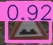

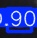

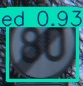

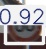

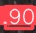

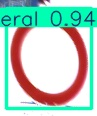

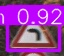

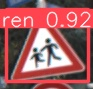

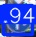

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


In [ ]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/events.out.tfevents.1740355716.6f9758315b04.5646.0 (deflated 92%)
  adding: train/confusion_matrix.png (deflated 18%)
  adding: train/val_batch2_pred.jpg (deflated 15%)
  adding: train/train_batch1500.jpg (deflated 19%)
  adding: train/train_batch1.jpg (deflated 7%)
  adding: train/args.yaml (deflated 52%)
  adding: train/val_batch0_pred.jpg (deflated 14%)
  adding: train/results.csv (deflated 60%)
  adding: train/R_curve.png (deflated 19%)
  adding: train/F1_curve.png (deflated 13%)
  adding: train/results.png (deflated 8%)
  adding: train/confusion_matrix_normalized.png (deflated 18%)
  adding: train/val_batch1_pred.jpg (deflated 17%)
  adding: train/train_batch1502.jpg (deflated 14%)
  adding: train/labels.jpg (deflated 35%)
  adding: train/val_batch0_labels.jpg (deflated 15%)
  adding: train/train_batch2.jpg (deflated 7%)
  adding: train/val_batch1_labels.jpg (deflated 17%)
  adding: 

In [ ]:
# This takes forever for some reason, you can also just download the model from the sidebar
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>